# 3. Preprocess - 데이터의 학습에 대한 이해
: 이미지들을 **batch size**마다 나눠가지고(한꺼번에 다 넣어줄 수 없으니), 모델레 넣어서 학습시킴 

In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data_paths = glob('/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/*.png')


In [6]:
path = data_paths[0]
path

'/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/32270_deer.png'

In [11]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype = tf.float32)

image.shape

TensorShape([32, 32, 3])

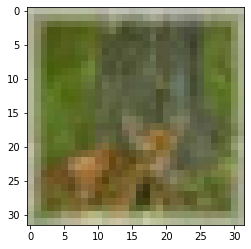

In [12]:
#가져온 데이터를 시각화
plt.imshow(image)
plt.show()

In [13]:
#위의 과정을 함수화

def read_image(path) :
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype = tf.float32)
    return image

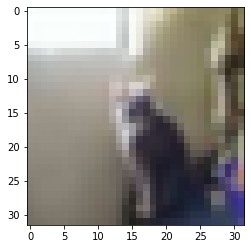

In [14]:
plt.imshow(read_image(data_paths[1])) #만든 함수를 상용
plt.show()

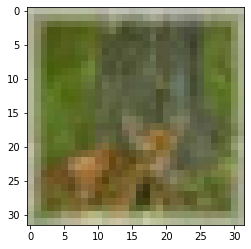

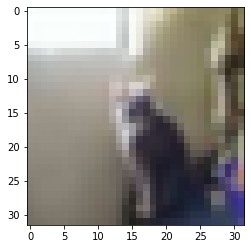

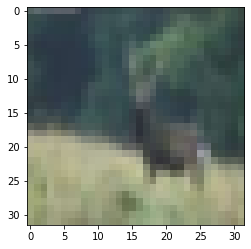

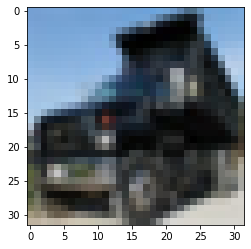

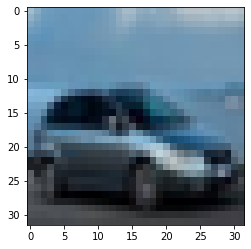

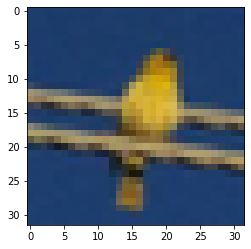

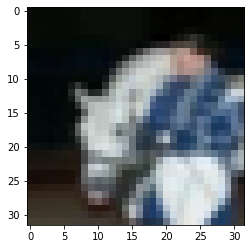

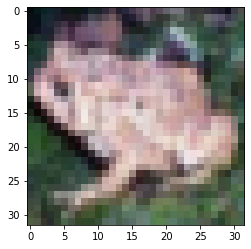

In [18]:
#8개 정도 쭉 시각화해보면

for i in range(8):
    plt.imshow(read_image(data_paths[i]))
    plt.show()

이런 이미지들을 batch size마다 나눠가지고(한꺼번에 다 넣어줄 수 없으니), 모델레 넣어서 학습시킴 
그 후
## 2) Images in List : 
batch_images라고, 몇 개의  이미지를 묶어서 리스티화 해준다. -> 그래서 하나의 array나 tensor로 만들어준다. 

In [19]:
batch_images = []

In [20]:
for path in data_paths[:8] : 
    image = read_image(path)
    batch_images.append(image)

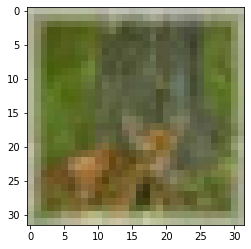

8

In [22]:
plt.imshow(batch_images[0]) #아직은 batch_images 가 read_image 0~8을 포개놓은 것과 같다. 
plt.show()
len(batch_images) # 이렇게 몇 개의 이미지를 묶어서 리스트화 해 준 뒤 

In [23]:
# 하나의 array로 만들어 주기
np.array(batch_images).shape

(8, 32, 32, 3)

In [24]:
#하나의 tensor로 만들어 주기 #단, data의 shape이 맞아야 함 (여기선 다 32, 32, 3으로 맞는다. )
image_tensor = tf.convert_to_tensor(batch_images)
image_tensor.shape

TensorShape([8, 32, 32, 3])

## 3) 앞의 내용 싹 다 정리

In [34]:
def make_batch(batch_paths) : 
    batch_images = []
    
    for path in batch_paths : 
        image = read_image(path)
        batch_images.append(image)
        
    return tf.convert_to_tensor(batch_images)

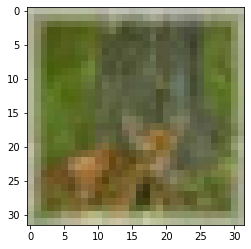

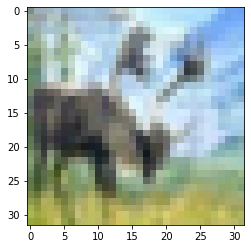

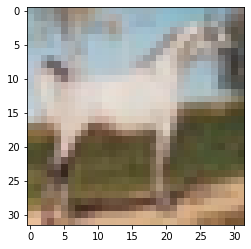

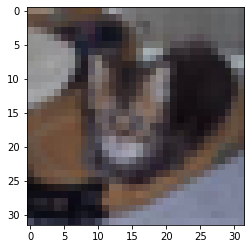

In [36]:
batch_size = 16

for step in range(4) : 
    batch_images = make_batch(data_paths[step * batch_size: (step+1) * batch_size])
    
    plt.imshow(batch_images[0]) #각 batch의 첫 번째 이미지만 시각화 해 봄
    plt.show()

In [28]:
batch_images = make_batch(data_paths[:8])
batch_images.shape

TensorShape([16, 32, 32, 3])